In [12]:
!pip3 install pandas
!pip3 install matplotlib
!pip3 install numpy
!pip install plotly express
!pip install scikit-learn
!pip install sklearn

Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable


## Install dependences

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import plotly.express as px
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score

### function to get module


In [2]:
def getModule(x,y):
    return np.sqrt(x**2 + y**2)

### The format of input dataframe is PosX, PosY, vel. This function transform in a dataframe Module(PosX, PosY), vel

In [3]:
def getDf(df, first):
    dfplot = pd.DataFrame(columns=['posicao', 'velocidade'])
    for i in range(len(df)):
        x = df.iloc[i][0] - first[0]
        y = df.iloc[i][1] - first[1]
        v = df.iloc[i][2] 
        module = getModule(x,y)
        dfplot.loc[i] = [module/1000, v]
    return dfplot

### interative plot for any CSV

In [5]:
df = pd.read_csv('/home/jp/Documents/Ball-analysis/csv/4.csv', header= None)
df = getDftoIntercept(df)
#df.drop_duplicates(subset=['posicao'], keep='first', inplace=True)
fig = px.line(df,x='posicao',y='velocidade')
fig.show()

In [17]:
print(df.iloc[15])

posicao       3.565463
velocidade    3.849820
Name: 59, dtype: float64


### This Pair are: 
### To Start: (first position with point in a Reta1, Last Position with point in a Reta1)
### To Stop: (First position with point in a Reta2, Last Position with point in a Reta2)

In [7]:
start = [(0,7),(5,11),(0, 14), (3, 20), (10, 17), (10,20), (7, 25), (13,30)]
stop = [(10,40),(80, 120),(100, 200), (21, 150), (40, 100), (45, 81), (45, 60), (38,50)]

In [6]:
start = [(3,5),(0,4),(3,8)]
stop = [(10,28),(5,15),(10,15)]

### Print all dataframes

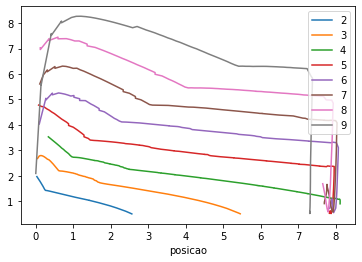

In [7]:
dataframes = []
firsts = []
ax = plt.subplot()
for i in range(2,10):
    dataframes.append(pd.read_csv('/home/jp/Documents/Ball-analysis/csv/'+str(i)+'.csv', header= None))
    firsts.append(dataframes[len(dataframes)-1].iloc[0])
    dataframes[len(dataframes)-1].drop(0, axis=0, inplace= True)
    dataframes[len(dataframes)-1] = getDf(dataframes[len(dataframes)-1], firsts[len(firsts)-1])
    ax = dataframes[len(dataframes)-1].plot(ax = ax, x = 'posicao',y = 'velocidade', kind = 'line', label = str(i))


### This function get a new df equals "getDf", but has a filter to remove duplicates and get only points after max vel, to remove the vel in adjust angle of robot

In [4]:
def getDftoIntercept(dfregressao):
    dfregressao1 = pd.DataFrame(columns=['posicao', 'velocidade'])
    start = dfregressao.iloc[0]
    dfregressao.drop(0, axis=0, inplace= True)
    dfregressao1 = getDf(dfregressao, start)
    max = dfregressao1.max(axis=0)[1]
    index = dfregressao1[dfregressao1['velocidade'] == max].index[0]
    dfregressao1 = dfregressao1.iloc[index:]
    return dfregressao1.drop_duplicates(subset=['posicao'], keep='first', inplace=False)
    

### getAlpha in a straight
### getBeta in a straight
### get Y in a straight equation

In [7]:
def getA(x,y,x2,y2):
    return (y2-y)/(x2-x)
def getB(a,x,y):
    return y - a*x
def reta(a,b,x):
    return a*x + b

In [8]:
def getRegressao(a, b, r):
    dfreta = pd.DataFrame(columns=['posicao', 'velocidade'])
    for i in range(r):
        y = reta(a,b,i)
        dfreta.loc[i] = [i, y]
    return dfreta


### Get interception of two straights

In [9]:
def getInterception(a,b,a1,b1):
    x = (b-b1)/(a1-a)
    y = reta(a,b,x)
    return(x,y)

### For all csv in a range, append the force and a df with (module, vel) collums

In [10]:
dfprecision = []
forcas = []
for i in range(2,5):
    dataframe = pd.read_csv('/home/jp/Documents/ssl-unification/csvs/'+str(i)+'.csv', header= None)
    dfprecision.append(getDftoIntercept(dataframe))
    forcas.append(i)

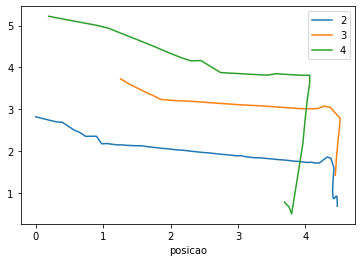

In [11]:
ax = plt.subplot()
for i in range(len(dfprecision)):
    ax = dfprecision[i].plot(ax = ax, x = 'posicao',y = 'velocidade', kind = 'line', label = str(forcas[i]))
    

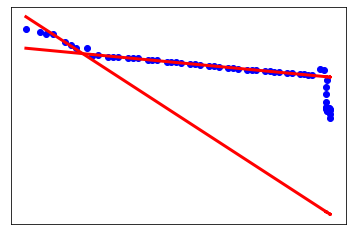

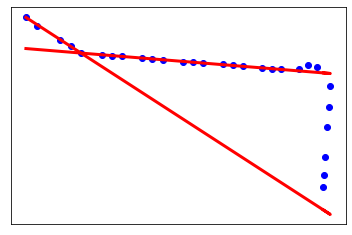

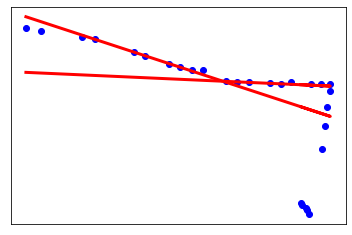

In [12]:
angular1 = []
angular2 = []
linear1 = []
linear2 = []
count = 0
for i in dfprecision:
    # get points using slice
    points1 = i.iloc[start[count][0]:start[count][1]]
    points2 = i.iloc[stop[count][0]: stop[count][1]]
    # declare a linear regression object
    reg = linear_model.LinearRegression()
    reg2 = linear_model.LinearRegression()
    # train using only the points in the slice
    reg.fit(points1[['posicao']], points1[['velocidade']])
    reg2.fit(points2[['posicao']], points2[['velocidade']])
    # append the coefficients
    angular1.append(reg.coef_)
    angular2.append(reg2.coef_)
    linear1.append(reg.intercept_)
    linear2.append(reg2.intercept_)
    # plot graphs
    plt.scatter(i['posicao'], i['velocidade'], color='blue')
    plt.plot(i['posicao'], reg.predict(i[['posicao']]), color='red', linewidth=3)
    plt.plot(i['posicao'], reg2.predict(i[['posicao']]), color='red', linewidth=3)
    plt.xticks(())
    plt.yticks(())
    plt.show()
    count += 1

In [13]:
interceptions = pd.DataFrame(columns=['dist', 'vel'])
retas1 = []
retas2 = []
# get interception points and straight lines
for i in range(len(angular1)):
    point = (getInterception(float(angular1[i]), float(linear1[i]), float(angular2[i]), float(linear2[i])))
    interceptions.loc[i] = [point[0], point[1]]
    retas1.append(getRegressao(float(angular1[i]), float(linear1[i]), 8))
    retas2.append(getRegressao(float(angular2[i]), float(linear2[i]), 8))


    

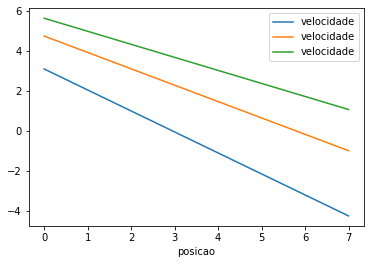

In [14]:
ax = plt.subplot()
for i in retas1:
    ax = i.plot(ax = ax, x = 'posicao',y = 'velocidade', kind = 'line')

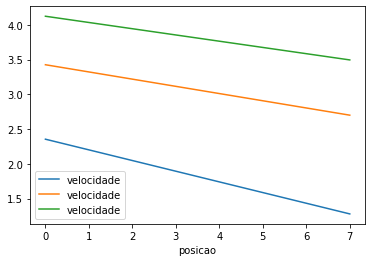

In [15]:
ax = plt.subplot()
for i in retas2:
    ax = i.plot(ax = ax, x = 'posicao',y = 'velocidade', kind = 'line')

<AxesSubplot:xlabel='dist', ylabel='vel'>

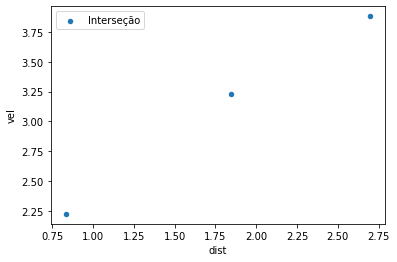

In [16]:
interceptions.plot(x = 'dist',y = 'vel', kind = 'scatter', label = 'Interseção')

In [18]:
len(forcas)

3

In [17]:
# train using angular coefficients to get a general value
reta1a = pd.DataFrame(columns=['forca', 'angular'])
reta2a = pd.DataFrame(columns=['forca', 'angular'])
for i in range(len(forcas)):
    reta1a.loc[i] = [forcas[i], angular1[i]]
for i in range(len(forcas)):
    reta2a.loc[i] = [forcas[i], angular2[i]]
rega1 = linear_model.LinearRegression()
rega2 = linear_model.LinearRegression()
rega1.fit(reta1a[['forca']], reta1a[['angular']])
rega2.fit(reta2a[['forca']], reta2a[['angular']])

LinearRegression()

In [18]:
# train using linear coefficients to get a general value
reta1b = pd.DataFrame(columns=['forca', 'linear'])
reta2b = pd.DataFrame(columns=['forca', 'linear'])
for i in range(len(forcas)):
    reta1b.loc[i] = [forcas[i], linear1[i]]
for i in range(len(forcas)):
    reta2b.loc[i] = [forcas[i], linear2[i]]
regb1 = linear_model.LinearRegression()
regb2 = linear_model.LinearRegression()
regb1.fit(reta1b[['forca']], reta1b[['linear']])
regb2.fit(reta2b[['forca']], reta2b[['linear']])


LinearRegression()

In [19]:
a = regb1.predict(reta1b[['forca']])
b = regb2.predict(reta2b[['forca']])

In [20]:
# predict beta1
def predictb1(x):
    return float(regb1.coef_*x + regb1.intercept_)
# predict beta2
def predictb2(x):
    return float(regb2.coef_*x + regb2.intercept_)
# predict alpha1
def predicta1(x):
    return float(rega1.coef_*x + rega1.intercept_)
# predict alpha2
def predicta2(x):
    return float(rega2.coef_*x + rega2.intercept_)

In [21]:
# get reta1
def reta1(x, f):
    return predicta1(f)*x +predictb1(f)
#get reta2
def reta2(x,f):
    return predicta2(f)*x +predictb2(f)

In [22]:
# get a speed in a position using initial force
def speed(x, f):
    x_intersection = getInterception(predicta1(f), predictb1(f), predicta2(f), predictb2(f))[0]
    if(x < x_intersection):
        return reta1(x, f)
    if(x > x_intersection):
        return reta2(x, f)

In [23]:
#predict of our model to all forces

predforcas = [2,3,4]
estimated = []
for i in predforcas:
    testFunction = pd.DataFrame(columns=['posicao', 'velocidade predita'])
    for j in range(len(dfprecision[2])):
        testFunction.loc[j] = [dfprecision[2]['posicao'].iloc[j], float(speed(dfprecision[2]['posicao'].iloc[j], i))]
    estimated.append(testFunction)


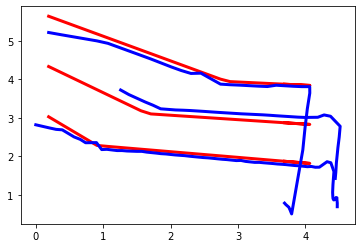

In [24]:
ax = plt.subplot()
for i in estimated:
    plt.plot(i['posicao'], i['velocidade predita'], color='red', linewidth=3)
for i in dfprecision:
    plt.plot(i['posicao'],i['velocidade'], color = 'blue', linewidth=3)
plt.show()

<AxesSubplot:xlabel='posicao'>

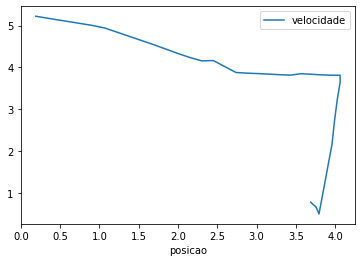

In [25]:
df55 = pd.read_csv('/home/jp/Documents/ssl-unification/csvs/4.csv', header= None)
#df55 = pd.read_csv('/home/jp/Documents/ssl-unification/bin/output.csv', header= None)
df55 = getDftoIntercept(df55)
df55.plot(x = 0, y = 1, kind = 'line')


<AxesSubplot:xlabel='posicao'>

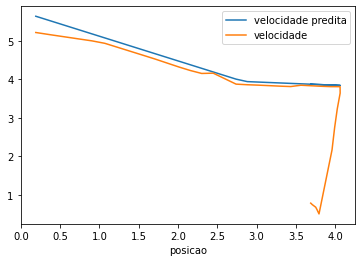

In [26]:
# compare the model with the real data
predictdf55 = pd.DataFrame(columns=['posicao', 'velocidade predita'])
for i in range(len(df55)):
    predictdf55.loc[i] = [df55.iloc[i][0], float(speed(df55.iloc[i][0], 4))]
ax = predictdf55.plot(x = 'posicao', y = 'velocidade predita', kind = 'line')
df55.plot(ax = ax, x = 0, y = 1, kind = 'line')

In [27]:
# get the intercept straight
intercptCoeficients = linear_model.LinearRegression()
intercptCoeficients.fit(interceptions[['dist']], interceptions[['vel']])

LinearRegression()

In [88]:
intercptCoeficients.intercept_

array([1.51503451])

In [45]:
#reta1
#alpha1 = rega1.coef_ -- 0.00022651
#beta1 = rega1.intercept_ -- -0.00238242
#alpha2 = regb1.coef_ -- 1.02904493
#beta2 = regb1.intercept_ -- -0.04840716

#reta2
#alpha1 = rega2.coef_ -- 3.77986975e-05
#beta1 = rega2.intercept_ -- -0.00038448
#alpha2 = regb2.coef_ -- 0.73483058
#beta2 = regb2.intercept_ -- 0.0063094

#intercept
#alpha = intercptCoeficients.coef_ -- 0.00094438
#beta = intercptCoeficients.intercept_ -- 1.61762938

In [46]:
#reta1
#alpha1 = rega1.coef_ -- 0.00019902
#beta1 = rega1.intercept_ -- -0.00143789
#alpha2 = regb1.coef_ -- 1.26965886
#beta2 = regb1.intercept_ -- 0.68835151

#reta2
#alpha1 = rega2.coef_ -- 3.19033766e-05
#beta1 = rega2.intercept_ -- -0.00021141
#alpha2 = regb2.coef_ -- 0.88463853
#beta2 = regb2.intercept_ -- 0.64703287

#intercept
#alpha = intercptCoeficients.coef_ -- 0.00089133
#beta = intercptCoeficients.intercept_ -- 1.51503451

In [47]:
# General Form to get a force in a position and speed
#Force = (vel - (Beta1*Position) - Beta2) / Alpha1*Position + Alpha2

In [99]:
intercptCoeficients.coef_

array([[0.89133482]])

In [28]:
def getPassParameters(dist, vel):
  interception = (vel - 1.51503451) / 0.89133482
  if interception >= dist:
      return getPassParameters(dist, vel - 0.5)
  else:
      return vel  
def getPassForce(dist):
  alpha1 = 0.03190338
  beta1 = -0.21140871
  alpha2 = 0.88463853 
  beta2 = 0.64703287
  force = 0
  idealforcetorecept = 4.5
  idealforcetorecept = getPassParameters(dist, idealforcetorecept)
  #if (getPassParameters(dist, idealforcetorecept) == True):
  #  alpha1 = 0.19902217
  #  beta1 = -1.43788717
  #  alpha2 = 1.26965886
  #  beta2 = 0.68835151
  #else:
  #  alpha1 = 0.03190338
  #  beta1 = -0.21140871
  #  alpha2 = 0.88463853 
  #  beta2 = 0.64703287
  #  a = 1
  force = ((idealforcetorecept - (beta1 * dist) - beta2) / ((alpha1 * dist) + alpha2))
  return force

In [97]:
regb2.coef_

array([[0.88463853]])

<AxesSubplot:xlabel='dist'>

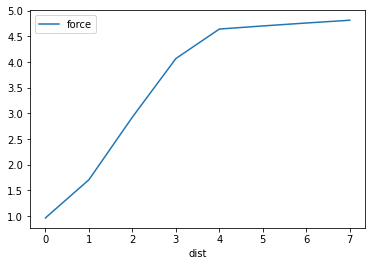

In [44]:
force = pd.DataFrame(columns=['dist', 'force', 'speed', 'reta'])
count = 0
for i in range(0,8):
    force.loc[count] = [i, getPassForce(i),speed(i, getPassForce(i)), getPassParameters(i,4.5)]
    count+=1
force.plot(x = 'dist', y = 'force', kind = 'line')

In [37]:
intercep = pd.DataFrame(columns = ["dist", "vel", "int"])
for i in range(7):
    intercep.loc[i] = [i,(float)((intercptCoeficients.coef_*i)+intercptCoeficients.intercept_), 3]

<AxesSubplot:xlabel='dist'>

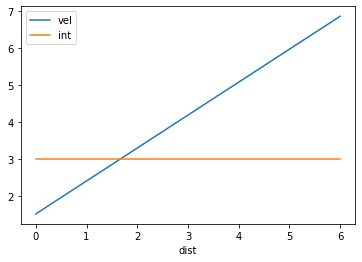

In [38]:
ax = intercep.plot(x = 'dist', y = 'vel', kind = 'line')
intercep.plot(ax = ax, x = 'dist', y = 'int')

In [42]:
for i in range(10):
    print("dist: " + str(i)+" -> " + str(force.loc[i][2]))

dist: 0 -> 1.9125546563379154
dist: 1 -> 1.9999999868056173
dist: 2 -> 2.9999999715956607
dist: 3 -> 3.999999949132188
dist: 4 -> 4.525447805634024
dist: 5 -> 4.499999915482421
dist: 6 -> 4.499999901788038
dist: 7 -> 4.499999887793503


In [49]:
a = 0
for i in range(10):
    print("dist: " + str(a) +" -> " + str(speed(a,getPassForce(a))))
    a += 0.5

dist: 0 -> 1.9125546563379154
dist: 0.5 -> 1.4999999914496314
dist: 1.0 -> 1.9999999868056173
dist: 1.5 -> 2.4999999801538593
dist: 2.0 -> 2.9999999715956607
dist: 2.5 -> 3.499999961225622
dist: 3.0 -> 3.999999949132188
dist: 3.5 -> 4.7200036880108325
dist: 4.0 -> 4.525447805634024
dist: 4.5 -> 4.499999922208326
